##FAO의 동아시아 곡물 생산량 자료 분석##

필수: 해당 자료를 Clustering분석하고 분석 결과로 나타난 그룹의 특성을 정의하시오.(외부 발표자료와 연계하여 정의하는 것도 가능)

선택1: 해당 자료를 1개 이상의 알고리즘으로 추가분석하여 각 지역/국가별 주요 곡물의 생산량을 예측하고 #1의 클러스터링 결과와 연계하여 각 클러스터(군집 결과)의 생산 체계와 전망을 설명하시오

선택2: 해당 자료를 1개 이상의 알고리즘으로 추가 분석하여 각 지역/국가별 주요 곡물의 생산량을 예측하고 각 지역의 곡물 거래량과 거래 가격을 고려하여 가장 수익성이 높은 지역을 선택하시오.

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy

fao_grain = pd.read_csv('C:/Users\Lenovo/.jupyter/FAO_sample data_final term.csv'
                        ,dtype='unicode')
# fao_grain
col_list = list(fao_grain.columns)
fao_grain_x = fao_grain[col_list[:12]]

fao_grain_fin = fao_grain[(fao_grain['Element Code']=='5312') & (fao_grain['Item Code']==27)]
fao_grain_fin = fao_grain_fin.loc[:, ['Area Code', 'Value']]
fao_grain_fin = fao_grain_fin.fillna(0)  #결측값을 0으로 채움

km = KMeans(n_clusters = 4, random_state=42) #함수의 무작위성을 컨트롤해서 재현 가능한 결과를 얻을 수 있다
km.fit(fao_grain_fin)  #fit함수로 모델 훈련

# grainDF = fao_grain_fin
# grainDF['labels'] = km.labels  #각 데이터에 대한 클러스터 결과물 0,1,2,3

# plt.show()
# plt.scatter(grainDF['Year'], grainDF['Value'], c=grainDF.labels, cmap='rainbow')
# plt.legend()


# dpoint = fao_grain_x.values  # 인덱스를 제외한 나머지 칼럼들의 값
# estimator = KMeans(n_clusters = 4).fit(dpoint)
# kmeans.labels_

# cluster_ids = estimator.fit_predict(fao_grain_x[['Item Code','Area']])
# plt.scatter(fao_grain_x['Item Code'],fao_grain_x['Area'], c= cluster_ids)
# plt.xlabel('Item code')
# plt.ylabel('Area')

# plt.show()


ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

In [3]:
#나동빈 강의
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sb

##FAO의 동아시아 곡물 생산량 자료 분석##

필수: 해당 자료를 Clustering분석하고 분석 결과로 나타난 그룹의 특성을 정의하시오.(외부 발표자료와 연계하여 정의하는 것도 가능)

선택1: 해당 자료를 1개 이상의 알고리즘으로 추가분석하여 각 지역/국가별 주요 곡물의 생산량을 예측하고 #1의 클러스터링 결과와 연계하여 각 클러스터(군집 결과)의 생산 체계와 전망을 설명하시오

선택2: 해당 자료를 1개 이상의 알고리즘으로 추가 분석하여 각 지역/국가별 주요 곡물의 생산량을 예측하고 각 지역의 곡물 거래량과 거래 가격을 고려하여 가장 수익성이 높은 지역을 선택하시오.

TypeError: nan is not a string

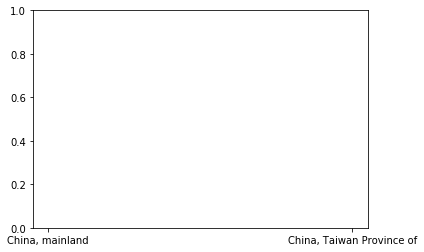

In [7]:
fao_grain = pd.read_csv('C:/Users\Lenovo/.jupyter/FAO_sample data_final term.csv'
                        ,dtype='unicode')
fao_grain.head()
# plt.scatter(fao_grain['Item Code'], fao_grain['Area'])
plt.scatter(fao_grain['Area'], fao_grain['Value'])


In [53]:
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [70]:
iPredicted = kmeans.fit_predict(fao_grain[['Area Code', 'Element Code', 'Item Code']])
iPredicted[30:190]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [88]:
fao_grain['cluster'] = iPredicted
fao_grain.drop('cluster', axis = 'columns', inplace = True)


fao_grain0 = fao_grain[fao_grain.cluster == 0]
fao_grain1 = fao_grain[fao_grain.cluster == 1]
fao_grain2 = fao_grain[fao_grain.cluster == 2]
fao_grain3 = fao_grain[fao_grain.cluster == 3]
plt.scatter(fao_grain0, Area Code, fao_grain0['Item'],color='green')
plt.scatter(fao_grain1, Area Code, fao_grain1['Item'],color='red')
plt.scatter(fao_grain2, Area Code, fao_grain2['Item'],color='black')
plt.scatter(fao_grain3, Area Code, fao_grain3['Item'],color='blue')

plt.xlabel('Area Code')
plt.ylabel('Item')
plt.legend()

SyntaxError: invalid syntax (<ipython-input-88-5a593083efe4>, line 9)